In [52]:
import pandas as pd

In [59]:
data = pd.read_csv("https://github.com/rishiberi17988/images/raw/main/insurancedata.csv")

In [63]:
 # Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = ['sex', 'smoker','region']
numerical_cols = ['age', 'bmi','children']
            
# Define the custom ranking for each ordinal variable
sex = ['male', 'female']
smoker = ["no" , "yes"]
region = ['southeast' , 'southwest' , 'northeast' , 'northwest']
            
            
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]

)
            
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[sex,smoker,region])),
    ('scaler',StandardScaler())
    ]

)
            
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [64]:
preprocessor.fit_transform(x)

array([[-1.43876426, -0.4536457 , -0.90861367,  1.0105187 ,  1.97058663,
        -0.40328924],
       [-1.50996545,  0.51418574, -0.07876719, -0.98959079, -0.5074631 ,
        -1.28788104],
       [-0.79795355,  0.38295436,  1.58092576, -0.98959079, -0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.02270734, -0.90861367,  1.0105187 , -0.5074631 ,
        -1.28788104],
       [-1.29636188, -0.79812808, -0.90861367,  1.0105187 , -0.5074631 ,
        -0.40328924],
       [ 1.55168573, -0.25679863, -0.90861367,  1.0105187 ,  1.97058663,
         1.36589436]])

In [38]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [41]:
data.duplicated().sum()

1

In [5]:
data.drop_duplicates(inplace=True)

In [132]:
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


In [133]:
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)


In [11]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [49]:
cat_cols=data.select_dtypes(include="object").columns

num_cols=X_train.select_dtypes(exclude="object").columns

In [50]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [51]:
num_cols

Index(['num_pipeline__age', 'num_pipeline__bmi', 'num_pipeline__children',
       'cat_pipeline__sex', 'cat_pipeline__smoker', 'cat_pipeline__region'],
      dtype='object')

In [28]:
sex = ['male', 'female']
smoker = ["no" , "yes"]
region = ['southeast' , 'southwest' , 'northeast' , 'northwest']

In [29]:
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',OrdinalEncoder(categories=[sex,smoker,region])),
                ('scaler',StandardScaler())
                ]

            )

In [24]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)


In [30]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)


In [31]:
preprocessor.fit_transform(X_train)


array([[ 0.47222651, -1.74857248,  0.73433626,  1.0246016 , -0.50874702,
         1.37087421],
       [ 0.54331294, -1.03670397, -0.91119211,  1.0246016 , -0.50874702,
         0.47863856],
       [ 0.8987451 , -0.93737348, -0.91119211,  1.0246016 , -0.50874702,
        -1.30583273],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211, -0.97598911, -0.50874702,
         0.47863856],
       [-0.16755139,  2.82063006,  0.73433626,  1.0246016 ,  1.96561348,
        -0.41359709],
       [ 1.1120044 , -0.1096194 , -0.91119211, -0.97598911, -0.50874702,
        -0.41359709]])

In [32]:
preprocessor.fit_transform(x_test)

array([[ 0.45859585, -0.93352178,  0.82250933,  0.95618289, -0.50233101,
         0.49204543],
       [-0.18713281, -0.17120196, -0.89961958,  0.95618289, -0.50233101,
         1.34833227],
       [ 1.82180078, -0.66353351, -0.89961958,  0.95618289,  1.99071921,
         1.34833227],
       ...,
       [-0.04363755, -0.48883522, -0.03855512, -1.04582503, -0.50233101,
         0.49204543],
       [ 1.1043245 ,  2.59220741, -0.89961958,  0.95618289,  1.99071921,
        -1.22052827],
       [ 0.88908162,  0.49582789, -0.03855512,  0.95618289, -0.50233101,
        -0.36424142]])

In [33]:
preprocessor.get_feature_names_out()

array(['num_pipeline__age', 'num_pipeline__bmi', 'num_pipeline__children',
       'cat_pipeline__sex', 'cat_pipeline__smoker',
       'cat_pipeline__region'], dtype=object)

In [34]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [117]:
data.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


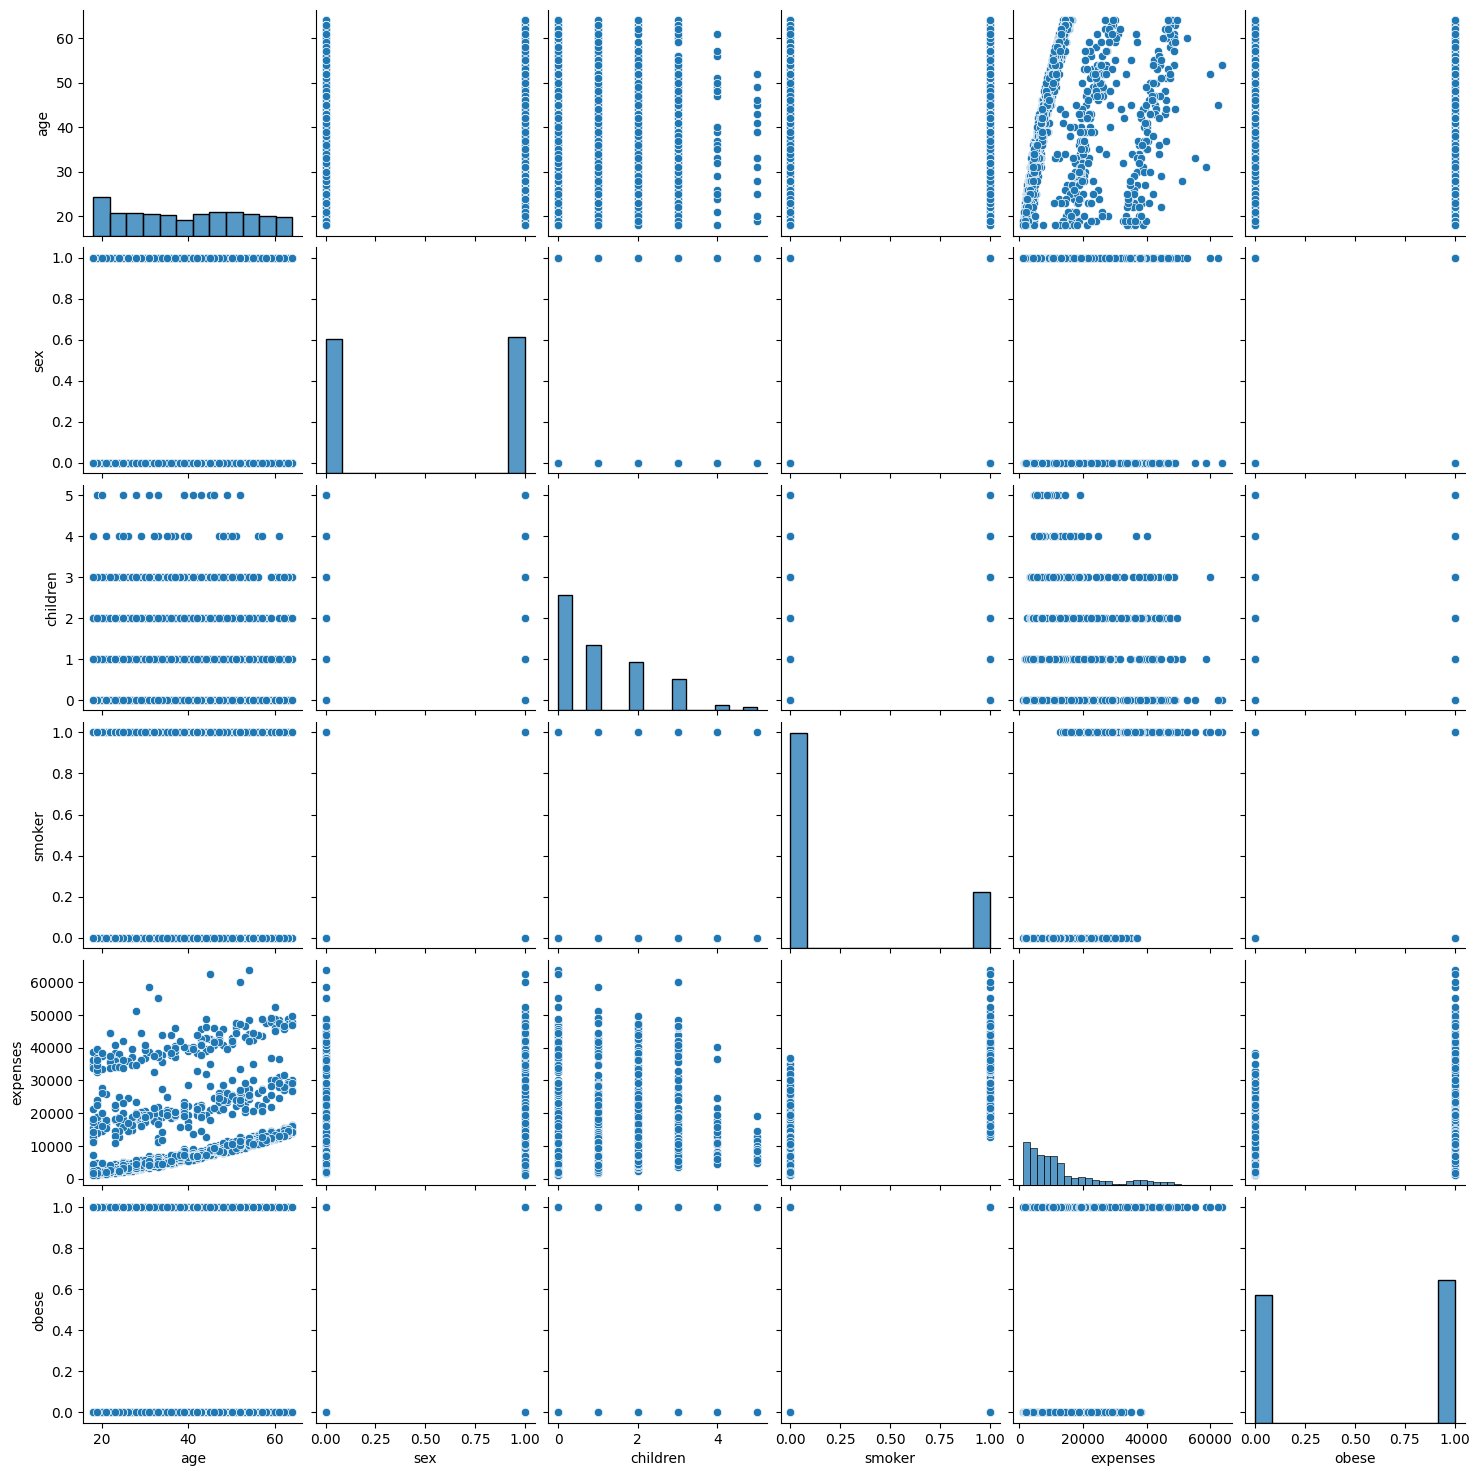

In [52]:
sns.pairplot(data)
plt.show()

In [60]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [61]:
y = data["expenses"]

In [5]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [62]:
x = data.drop("expenses", axis = 1)

In [7]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state= 42)

In [138]:
X_train.head()

,age,sex,bmi,children,smoker
1114,23,1,24.5,0,0
968,21,1,25.7,2,0
599,52,0,37.5,2,0
170,63,1,41.5,0,0
275,47,0,26.6,2,0


In [121]:
columns = X_train.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

In [122]:
x = StandardScaler().fit_transform(X_train)

In [123]:
x = pd.DataFrame(x,columns=columns)

In [124]:
X_train = x

In [125]:
x_test = StandardScaler().fit_transform(x_test)
x_test = pd.DataFrame(x_test,columns=columns)

In [126]:
x_test

,age,sex,bmi,children,smoker
0,0.680704,1.069579,-1.380468,-0.915774,-0.537086
1,-0.725297,-0.934947,-0.886097,2.292427,-0.537086
2,0.821304,-0.934947,0.836231,1.490377,-0.537086
3,-0.584697,1.069579,0.517281,1.490377,1.861899
4,-0.584697,1.069579,1.155181,0.688327,-0.537086
...,...,...,...,...,...
263,1.735204,1.069579,1.490078,-0.915774,-0.537086
264,1.664904,-0.934947,0.820284,-0.915774,-0.537086
265,-1.217397,-0.934947,0.549176,0.688327,-0.537086
266,1.524304,1.069579,0.820284,-0.113724,1.861899


In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso , ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [36]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor(),
    'knneighbour':KNeighborsRegressor(),
    'descision_tree':DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}

In [37]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [38]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
KNeighborsRegressor()
DecisionTreeRegressor()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_byno

In [39]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [41]:
Y_train.head

<bound method NDFrame.head of 560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64>

In [47]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,Y_train)

    #make_prediction
    y_pred=model.predict(x_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 33688769.40741346
MAE: 4190.488209830604
R2 SCORE: 0.7830013256877739


model training performance Lasso()
MSE: 33692282.683836594
MAE: 4190.741129197711
R2 SCORE: 0.782978695703369


model training performance Ridge()
MSE: 33696547.824269764
MAE: 4192.2301147084745
R2 SCORE: 0.7829512227550828


model training performance ElasticNet()
MSE: 49262839.37291558
MAE: 5277.287233415965
R2 SCORE: 0.68268443683709


model training performance RandomForestRegressor()
MSE: 20823835.481914155
MAE: 2507.188676865672
R2 SCORE: 0.8658679205813649


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None

In [16]:
df = pd.read_csv("https://github.com/rishiberi17988/images/raw/main/insurancedata.csv")
df.drop_duplicates(inplace=True)


In [25]:
import numpy as np
train_arr = np.c_[X_train, np.array(Y_train)]

In [17]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

In [18]:
y=df[['expenses']]
df=df.drop(columns=['expenses'],axis=True)

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(df,y,random_state=41,test_size=0.2)

In [24]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [20]:
columns = X_test.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [21]:
X_train= StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train , columns=columns)


In [22]:
X_train

,age,sex,bmi,children,smoker,region
0,-0.372605,-0.976881,0.847024,-0.910266,-0.519227,1.348368
1,-1.442386,-0.976881,-1.437536,-0.910266,-0.519227,1.348368
2,-0.586561,-0.976881,1.450801,-0.078579,-0.519227,-1.275549
3,0.839813,-0.976881,1.483437,-0.078579,-0.519227,-0.400910
4,1.410362,-0.976881,1.108117,-0.910266,-0.519227,-0.400910
...,...,...,...,...,...,...
1064,0.554538,1.023666,-1.143806,-0.078579,-0.519227,-0.400910
1065,0.055307,-0.976881,0.765433,1.584797,-0.519227,-0.400910
1066,-0.943155,1.023666,-0.164709,2.416485,-0.519227,0.473729
1067,1.053769,1.023666,0.096383,-0.910266,-0.519227,-1.275549


In [196]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,Y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(Y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 31808317.639385138
MAE: 3966.972283473395
R2 SCORE: 0.7043889705481687


model training performance Lasso()
MSE: 31804128.17982732
MAE: 3967.229680750336
R2 SCORE: 0.7044279053471347


model training performance Ridge()
MSE: 31734227.13829244
MAE: 3974.303851137697
R2 SCORE: 0.7050775316204304


model training performance ElasticNet()
MSE: 69734636.42297122
MAE: 6774.261209869366
R2 SCORE: 0.35192021485855085


model training performance RandomForestRegressor()
MSE: 21640644.51343793
MAE: 2618.9122889125806
R2 SCORE: 0.7988823780262599




/Users/kshitijberi/Documents/GitHub/insurance-premium/env/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kshitijberi/Documents/GitHub/insurance-premium/env/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
MSE: 26408866.765628185
MAE: 3130.4330878550973
R2 SCORE: 0.7545688401458472


model training performance KNeighborsRegressor()
MSE: 101381862.46982256
MAE: 7165.144097014924
R2 SCORE: 0.057806292296962325


model training per

/Users/kshitijberi/Documents/GitHub/insurance-premium/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
max(r2_list)

0.8675475610793262